In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [97]:
data = pd.read_csv("Clean_Dataset.csv")

In [98]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [99]:
data.set_index("Unnamed: 0", inplace=True)

In [100]:
data.shape

(300153, 11)

In [101]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
Unnamed: 0,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [102]:
data.rename(columns = {'class': 'hierarchy'}, inplace = True)

In [103]:
# Classification of Airlines
print("Airlines:")
data.airline.value_counts()

Airlines:


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [104]:
#Classification of Source Cities
print("Source City: ")
data.source_city.value_counts()

Source City: 


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [105]:
# Classification of Destination Cities
print("Destination City")
data.destination_city.value_counts()

Destination City


destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [106]:
# Classification of Departure Time
print("Departure City")
data.departure_time.value_counts()

Departure City


departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [107]:
# Classification of Arrival Time\
print("Arrival Time:")
data.arrival_time.value_counts()

Arrival Time:


arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [108]:
# Classification of Class
print("Hierarchy")
data.hierarchy.value_counts()

Hierarchy


hierarchy
Economy     206666
Business     93487
Name: count, dtype: int64

# Data Preprocessing

In [109]:
data = data.drop("flight", axis=1)

In [110]:
data["hierarchy"] = data["hierarchy"].apply(lambda x: 1 if x=="Business" else 0)
data.stops = pd.factorize(data.stops)[0]

In [111]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,hierarchy,duration,days_left,price
Unnamed: 0,,,,,,,,,,
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [112]:
data = data.join(pd.get_dummies(data.airline, prefix="airline", dtype='int')).drop("airline", axis=1) 
data = data.join(pd.get_dummies(data.source_city, prefix="source", dtype='int')).drop("source_city", axis=1) 
data = data.join(pd.get_dummies(data.destination_city, prefix="destination", dtype='int')).drop("destination_city", axis=1) 
data = data.join(pd.get_dummies(data.departure_time, prefix="departure", dtype='int')).drop("departure_time", axis=1) 
data = data.join(pd.get_dummies(data.arrival_time, prefix="arrival", dtype='int')).drop("arrival_time", axis=1) 

In [113]:
data.head()

,stops,hierarchy,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Model

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [115]:
x,y = data.drop("price", axis=1), data.price

In [116]:
y

Unnamed: 0
0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [118]:
model = RandomForestRegressor(n_jobs=-1)

model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [119]:
model.score(x_test, y_test)

0.9850375908184498

In [120]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [121]:
y_pred = model.predict(x_test)

In [122]:
print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9850375908184498
MAE:  1074.4564023943872
MSE:  7696173.991836814
RMSE:  2774.1979006258393


In [123]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Prediction vs Actual Price')

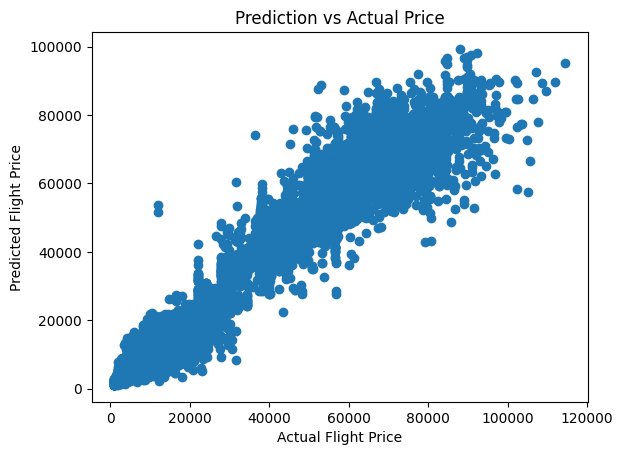

In [124]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction vs Actual Price")

In [125]:
# important_features_dict = {}
# for idx, val in enumerate(model.feature_importances_):
#     important_features_dict[idx] = val

# important_features_list = sorted(important_features_dict, key=important_features_dict.get, reverse=True)
# print(f"5 most important features: {important_features_list[:5]}")

In [126]:
importances = dict(zip(model.feature_names_in_, model.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('hierarchy', 0.8801800589680604),
 ('duration', 0.05753571893154218),
 ('days_left', 0.018540315397802862),
 ('airline_Air_India', 0.005479350823088293),
 ('airline_Vistara', 0.004494570756164852),
 ('source_Delhi', 0.0035176601306432867),
 ('destination_Delhi', 0.0032293328280503597),
 ('source_Mumbai', 0.002206667031890168),
 ('destination_Mumbai', 0.001943365804298578),
 ('destination_Kolkata', 0.0018923866528776812),
 ('stops', 0.0018723353623894977),
 ('source_Kolkata', 0.0017136625717990052),
 ('arrival_Evening', 0.0015746194571826173),
 ('destination_Hyderabad', 0.0014657522729733994),
 ('destination_Bangalore', 0.0013036597372863266),
 ('source_Hyderabad', 0.0012906930350557939),
 ('arrival_Night', 0.0011289738143449401),
 ('departure_Evening', 0.001101231921379097),
 ('source_Bangalore', 0.0010550203352557637),
 ('arrival_Afternoon', 0.001006920655548485),
 ('destination_Chennai', 0.0009247667923984852),
 ('departure_Morning', 0.000918448545105288),
 ('source_Chennai', 0.000

<BarContainer object of 10 artists>

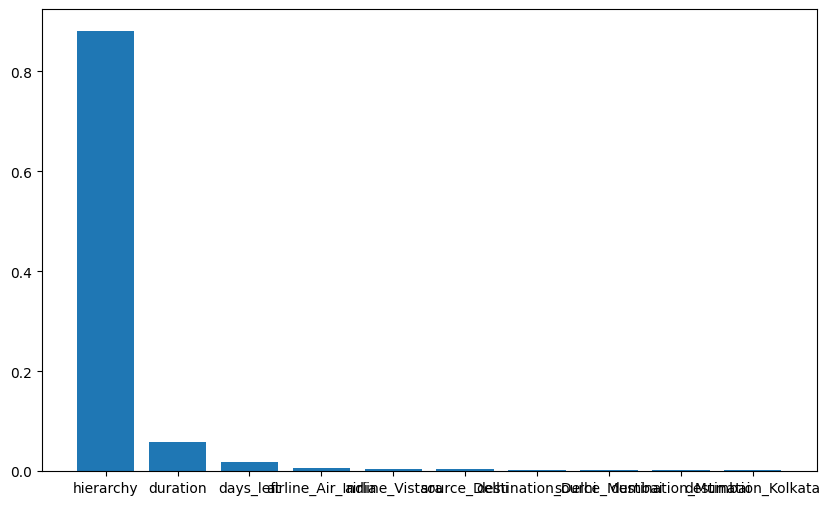

In [127]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])